In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt


In [4]:
df= pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\everything\eda + dap\dap\realistic_logistic_regression_data.csv')

In [5]:
df


,Age,Income,Previous Purchases,Purchased
0,56,91228,1,1
1,69,78984,2,0
2,46,70774,0,0
3,32,32568,4,0
4,60,92592,0,1
...,...,...,...,...
95,42,69353,8,1
96,62,92003,3,1
97,58,113211,0,1
98,46,82733,3,1


In [6]:
df.isnull().sum()

Age                   0
Income                0
Previous Purchases    0
Purchased             0
dtype: int64

In [7]:
df.dtypes

Age                   int64
Income                int64
Previous Purchases    int64
Purchased             int64
dtype: object

In [9]:
features = ['Age','Income','Previous Purchases']
X= df[features]
y=df['Purchased']


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr) 
r2 = r2_score(y_test, y_prob)
mse = mean_squared_error(y_test, y_prob)
mae = mean_absolute_error(y_test, y_prob)
print(f"R^2: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")



R^2: 0.8898078518398477
MSE: 0.026446115558436567
MAE: 0.07545591327236537


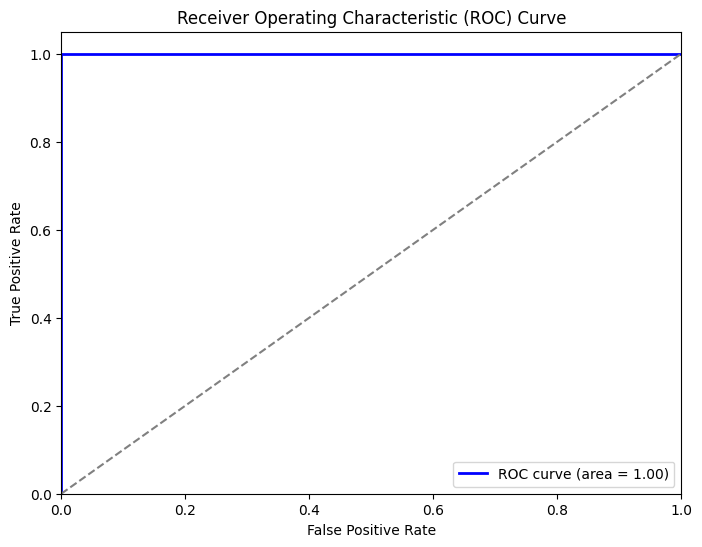

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()